# EXERCISE 1: : Data Analysis using CEREALS dataset

Author name: Aradhya Goswami Class III BTECH DSE Section B Batch 1 Week 4



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("Cereals1.xls")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### 1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [16]:
pd.crosstab(df.type,df.mfr)

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


### 2) Which is the cereal with the best rating, worst rating?

In [34]:
maxr=df['rating'].max()
cermax= df[df['rating']==maxr].index
minr=df['rating'].min()
cermin= df[df['rating']==minr].index
print('The best cereal is',df["name"][cermax])
print('The worst cereal is',df["name"][cermin])

The best cereal is 2    All-Bran_with_Extra_Fiber
Name: name, dtype: object
The worst cereal is 9    Cap'n'Crunch
Name: name, dtype: object


### 3) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

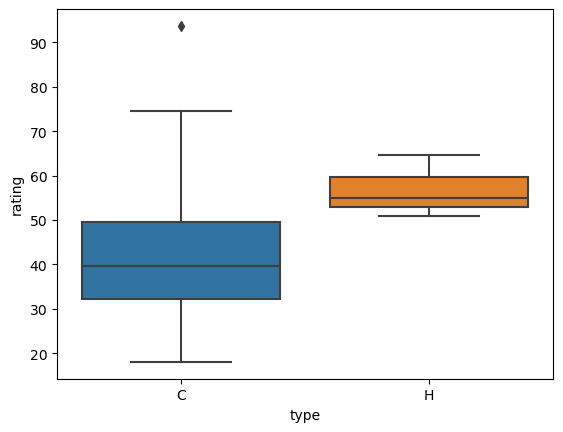

In [10]:
boxplot = sns.boxplot(x='type',y='rating',data=df)

### 4) Is there a relation between sugars, calories, carbs, and fat?

In [31]:
corr=['sugars','calories','carbo','fat']
df[corr].corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.571072,-0.349902,0.270861
calories,0.571072,1.000000,0.205913,0.510630
carbo,-0.349902,0.205913,1.000000,-0.329676
fat,0.270861,0.510630,-0.329676,1.000000


### 5) Which manufacturers produce cereal with highest calories?

In [15]:
maxcalo=df['calories'].max()
cermax=df[df['calories']==maxcalo].index
print(df["mfr"][cermax])

45    K
Name: mfr, dtype: object


### 6) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

In [20]:
df[["calories","rating"]].corr()

,calories,rating
calories,1.000000,-0.674336
rating,-0.674336,1.000000


<AxesSubplot:xlabel='calories', ylabel='rating'>

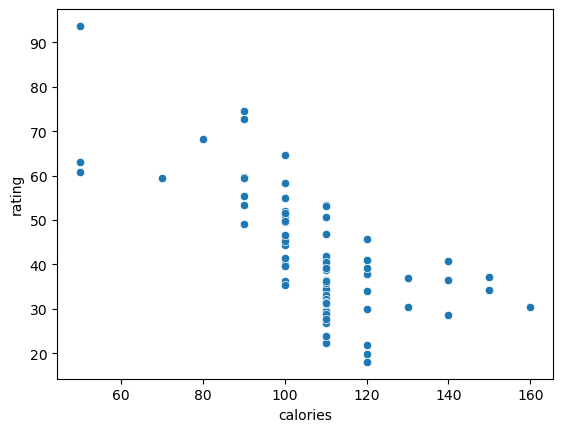

In [29]:
sns.scatterplot(x='calories',y='rating',data=df)

### 7) Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated? 

In [27]:
df[['shelf','rating']].corr()

,shelf,rating
shelf,1.000000,0.001973
rating,0.001973,1.000000


<AxesSubplot:xlabel='shelf', ylabel='rating'>

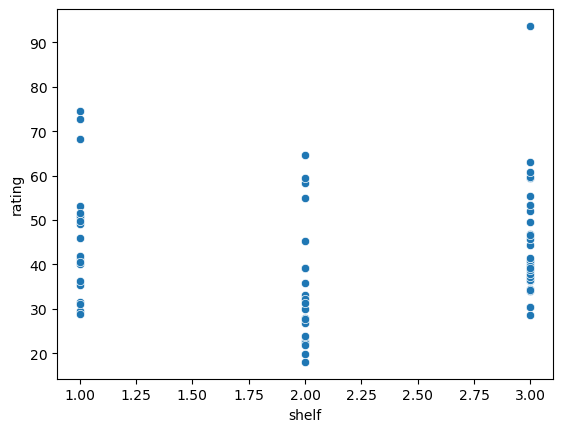

In [28]:
sns.scatterplot(x='shelf',y='rating',data=df)

### 8) Is there a relation between manufacturer and rating?

<AxesSubplot:xlabel='mfr', ylabel='rating'>

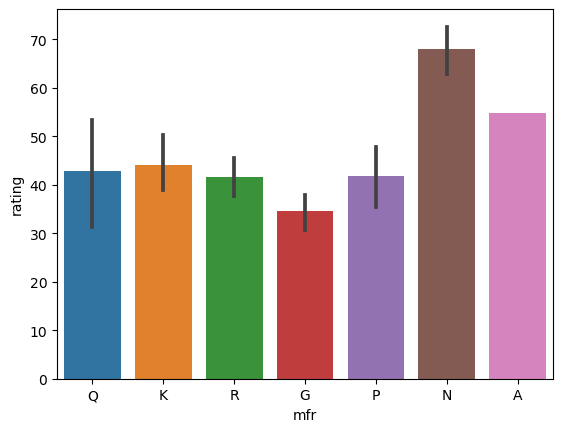

In [35]:
sns.barplot(x='mfr',y='rating',data=df)

In [38]:
print("Yes,you can see a difference from the above graph")

Yes,you can see a difference from the above graph


### 9) Which nutrients are essential for a good rating for a cereal?

In [37]:
df.corr()['rating'].sort_values(ascending=False)

rating      1.000000
fiber       0.557242
protein     0.453683
potass      0.339925
carbo       0.113173
shelf       0.001973
cups       -0.159953
vitamins   -0.242516
weight     -0.300187
sodium     -0.402077
fat        -0.418439
calories   -0.674336
sugars     -0.772303
Name: rating, dtype: float64

### 10) Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using an 80, 20 split.